In [1]:
## Regression
  # Used when you seek to understand or predict a given outcome variable in greater depth.
  # Can isolate unique or non-overlapping relationships among our variables, which is a problem in correlation.

# Continuing with same dataset from 11a
# Import/load packages to be used
 # Will use the ggplot2 package for data visualization, the corrplot package for making visual correlation tables, & psych package for detecting skew & making correlation matrices.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Samantha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Import dataset to be used as Pandas data frame

data = pd.read_csv("datasets/regionalhappy.csv")

# Explore the names
data.columns

Index(['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [3]:
# Above - Python doesn't allow . in column name, as the second part of the name is an attribute of the first.

# Can rename them easily by assigning names to columns attribute of the data frame:

data.columns = ["Happiness", "GDP", "Family", "Life_Expect", "Freedom", "Generosity", "Trust_Gov", "Dystopia"]
data.columns

Index(['Happiness', 'GDP', 'Family', 'Life_Expect', 'Freedom', 'Generosity',
       'Trust_Gov', 'Dystopia'],
      dtype='object')

In [4]:
# Look at 1st few rows

data.head()

,Happiness,GDP,Family,Life_Expect,Freedom,Generosity,Trust_Gov,Dystopia
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
# Predict Happiness by generating an equation that predicts the outcome from one or more predictors.
 # Single predictor: Y' = b0 + b1(x)
  # Guess each person's Y score (Y') by starting w. a constant (b0 = intercept) & adding that to their score on a predictor variable (x1), multiplied by its respective slope (b1).
 # Multiple predictors: Y' = b0 + b1(x) + b2(x) + b3(x) + b4(x)... where b is each of its respective slope
  # Each predictor you add should improve accuracy of prediction.
# Regression also  useful for understanding the variables.
 # Slope is the expected increase in outcome (gain in happiness) for every one unit of that predictor.
  # Larger the slope, the more 'potent' the variable. Get a lot of outcome out for every one unit of predictor.
  # Conversely, if slope = 0, the predictor literally would not matter (have no impact on the outcome)
    
# A Simple Regression
 # Predict Happiness from GDP using OLS (ordinary least squares) function from Statsmodels package.
  # OLS has two arguments, 
     # vector for response or dependent variable
     # an array containing one or more predictor or independent variables.
   # To get b0 (intercept term) the add_constant method must be used to add constant column to predictor array.
  # Summary method displays a number of statistics from a response object.

    
## Add a constant term to array of predictors to get an intercept term
predictors = sm.add_constant(data.GDP, prepend = False)

lm_mod = sm.OLS(data.Happiness, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     297.1
Date:                Tue, 20 Nov 2018   Prob (F-statistic):           1.11e-37
Time:                        16:59:15   Log-Likelihood:                -154.91
No. Observations:                 155   AIC:                             313.8
Df Residuals:                     153   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            2.1842      0.127     17.238      0.0

Range of Happiness = { 2.6930000780000003 7.537000179}


Text(0.5,0,'Happiness')

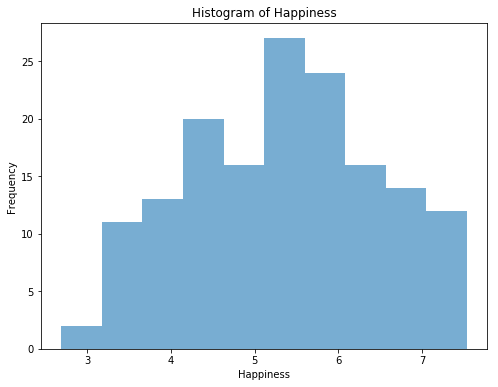

In [6]:
# Above - Model coefficients are displayed in summary.
 # Intercept is shown as const
   #  Regression equation is: Happiness' = 3.2 + 2.18*(GDP) 
 # Can take anyone's GDP score & plug it into this equation to predict their hapiness.
    
# Inspect what a 'high' happiness score is by inspecting it's distribution.

print('Range of Happiness = { ' + str(min(data.Happiness)) + ' ' + str(max(data.Happiness)) + '}')

ax = plt.figure(figsize=(8, 6)).gca() # define axis
data.Happiness.plot.hist(ax = ax, alpha = 0.6)
plt.title('Histogram of Happiness')
plt.xlabel('Happiness')

Text(0.5,0,'GDP')

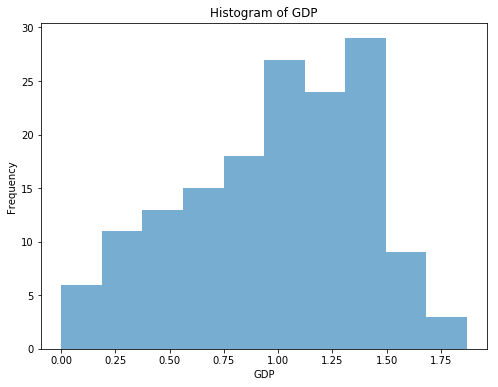

In [7]:
# Above - Happiness scores tend to range from ~2-8.

# Inspect the distribution of GDP scores

ax = plt.figure(figsize=(8, 6)).gca()   # define axis
data.GDP.plot.hist(ax = ax, alpha = 0.6)
plt.title('Histogram of GDP')
plt.xlabel('GDP')

In [8]:
# Above - GDP scores tend to range from 0-2.

# What if the GDP score was low of 0.05, what is the predicted Happiness score?

## Create a new data frame w/ predictor value & the constant
new_predict = pd.DataFrame({'GDP':[0.5], 'const':[1.0]})


## Make prediction w/ new values
res.predict(new_predict)

0    4.295305
dtype: float64

In [9]:
# Above - It is predicted that the Happiness score is 4.29.

# Giving several GDP scores (0.5, 0.9, 1.7), we can automate adding the constant column w/ the add_constant method.

# Create a new data frame w/ predictor value & constant
new_predict = pd.DataFrame({'GDP':[0.5, 0.9, 1.0]})
new_predict = sm.add_constant(new_predict, prepend = False)

# Make prediction w/ new values
res.predict(new_predict)

0    4.295305
1    5.168979
2    5.387398
dtype: float64

Text(0.5,1,'Happiness vs. GDP with linear regression line')

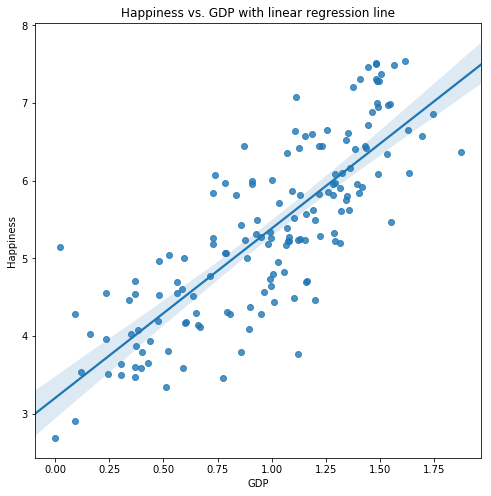

In [10]:
# Above- Easy tool to predict for new data w/ a trained model using predict().

# Visualize this relationship using Seaborn's regplot function to compute a regression line w/ confidence intervals & plots the line w/ scatter plot of data.

ax = plt.figure(figsize=(8, 8)).gca()   # define axis
sns.regplot(x="GDP", y="Happiness", data=data, ax = ax)
plt.title('Happiness vs. GDP with linear regression line')

In [11]:
# Above - The line is for GDP at 0.5.
 # Light blue band represents a 95% CI around the line, estimating the uncertainity in steepness of slope.
   # We are 95% confident that the "true" slope in population is somewhere in light blue band.
 # The relationship is 'significant' (not 0 or flat)
 # If we had a null hypothesis that the population slope was 0 (H0: Beta = 0), we could reject that.


# Inspecting the Regression
 # Get more information about the regression model by using summary() method on the results of the model res.

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     297.1
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           1.11e-37
Time:                        08:57:01   Log-Likelihood:                -154.91
No. Observations:                 155   AIC:                             313.8
Df Residuals:                     153   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            2.1842      0.127     17.238      0.0

Text(0.5,0,'Predicted Values')

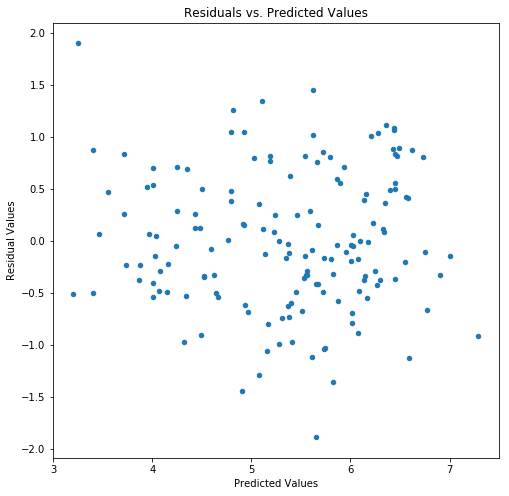

In [12]:
# Above - There are two parameters in the regression model
 #        1) intercept (shown as const)
 #        2) slope coefficent (shown as GDP)
 # Each exists in the population & we are estimating them in our sample.
 # p-value is P>|t|
 # The intercept is significant, meaning that it's "not 0" but at 3.2032.
 # The slope for GDP is 2.1842, can be confident that the slope is "not 0".
   # GDP is predicting Happiness. For each unit of GDP, Happiness changes by 2.1842 units.
 # Confidence Intervals represent 95% CIs of probabilities of the coefficient from 2.5% to 97.5%, or a range of 95%.

# Residuals - are the difference b/w actual value & predicted value.
 # Residual Plot - A scatter plot w/ residual values on vertical axis & predicted values or Score on horizontal axis.

# Create a new data frame w/ predictor value & constant
new_predict = data.GDP
new_predict = sm.add_constant(new_predict, prepend = False)

# Make prediction w/ new values
new_predict['Score'] = res.predict(new_predict)

# Compute residuals 
new_predict['Residuals'] = data.Happiness - new_predict.Score

ax = plt.figure(figsize=(8, 8)).gca()    # define axis
new_predict.plot.scatter(x='Score', y='Residuals', ax = ax)
plt.title('Residuals vs. Predicted Values')
plt.ylabel("Residual Values")
plt.xlabel('Predicted Values')

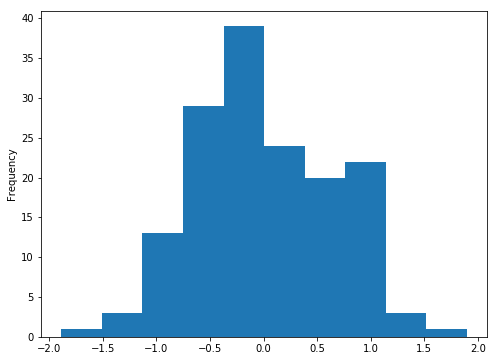

In [13]:
# Above - Residual values are generally in a small range & centered on zero.
 # There does not appear to be any particular change in dispersion (distribution) of residuals as the predicted score changes.
 # These observations indicate that the model is fairly good predictor of Happiness.

# Residual Standard Error - basicially the "average residual", sometimes also called the "standard error of the estimate"
 # Assessing the average degree to which points vary around the line
  # RSE = SQRT(Sum(y-y')^2 / (n-2))
 # Residual standard error for our model is 0.6617, meaning our Happiness predictions are "off" (on average) by 0.66 points.

# Median Residual (50th percentile) is close to zero, meaning we are not systematically over-predicting or under-predicting.

# Check for normal distribution.

ax = plt.figure(figsize=(8, 6)).gca()     # define axis
new_predict.Residuals.plot.hist(ax = ax)

In [14]:
# Above- Looks like a healthy & valid regression model. Residuals are beautifully Normally distributed.

# R^2 = 0.66 - represents the proportion of variance in the outcome (Happiness) that is explained by predictor(s) & is basically, the opposite of residuals.
 # Residuals represent unexplained variation while R^2 represents the portion of variation in Happiness that is explained.
  # The better the model, the higher the R^2 & smaller the residuals.
  # We have explained 66% of all the variance in Happiness w/ just the GDP.
    
# F-statistic is 297.1 w/ 153 DF (degrees of freedom), and a p-value of < 1.11e-37, which is a significane test for R^2 value.
 # Our model is explaining significant varaiation in happiness.
  #Redundant to the test of significance for slope, but it becomes very helpful when there are multiple predictors as a quick snapshot of signifcance of model.

## Multiple Regression
 # 3 reasons to add more predictors:
 #   1) Model predicts better given more information to predict with
 #   2) GDP may be caused by (& therefore serve as a proxy for) other variables that are more directly relevant
 #   3) GDP probably doesn't make people happy directly; it is likely causing other things like health care that are more directly relevant.
 # Reasons 2 & 3 are similiar but differ. Reason 2 suggests that something may be driving both GDP and Happiness (remember association/causal claims). GDP is acting as proxy
 #   for whatever that prior cause was...leading us to possibly misunderstand the role of GDP.
   # Must statistically control for any prior causes if we want a good view of what effect GDP has on Happiness (we can't know whether GDP is the cause of the effect).
 # Reason 3 suggests that GDP may do things that, in turn, help Happiness. Can still control for those variables, by giving "credit" for that relationship to the more proximal variable.
 #    (It will appear that health, not GDP predicts Happiness). Try to remember that GDP may still be ultimately responsible.
 # There is no way to tell the difference b/w 2 & 3. Thus data anlysis needs subject matter expertise to draw good conclusions for observational data.

# Controlling Prior Causes
 # Can easily control for a third (or forth, fifth, or any number) of variables just by simply adding them as other predictors in the regression.
 # One very helpful feature of regression is that every variable is examined controlling for/holding constant all the others, so regression lets you see the unique influence of each predictor.
  # It other words, it lets you see what the slope for each predictor would be, had participants has the same score on all the other predictors.
   # IMPORTANT- THis only works if you though ahead & measured every variable you need to control for.
    # This is another reason to advocate for collecting data & not simply relying on existing data repositories.
    
# Let's try to control for freedom

# Add a constant term to array of predictors to get an intercept term
predictors = sm.add_constant(data[['GDP','Freedom']], prepend = False)

lm_mod_2 = sm.OLS(data.Happiness, predictors)
res_2 = lm_mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     221.3
Date:                Fri, 23 Nov 2018   Prob (F-statistic):           9.64e-46
Time:                        08:58:32   Log-Likelihood:                -132.85
No. Observations:                 155   AIC:                             271.7
Df Residuals:                     152   BIC:                             280.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            1.8736      0.119     15.788      0.0

In [15]:
# Above - The residual standard error (average mis-prediction) has decreased some & our R^2 has increased.
 # That tells us we have "added" to our ability to predict Happiness.
    
# Can test whether that increase is significant w/ anova_lm(mod, mod2) from statsmodels.stats.anova package.

anova_lm(res, res_2, typ = 1)
# Can ignore RuntimeWarnings you get.

C:\Users\Samantha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Samantha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Samantha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,153.0,66.983338,0.0,NaN,NaN,NaN
1,152.0,50.385944,1.0,16.597394,50.069597,5.094782e-11


In [ ]:
# Above- This runs an F test w/ a significant result (p-value is Pr(>F), i.e., < 0.05). 
 # This tells us that adding health/life expectancy (Freedom) significantly (i.e., greater than chance) improved our prediction of Happiness.
 # R^2 value went up by 0.08 (i.e., 8.6%, mod: 0.66, mod2: 0.74) so we have explained an additional 8.6% of Happiness
  # Happiness' = 2.55 + 1.87*(GDP) + 2.36*(Freedom)
 # Slopes for GDP & Freedom are still significant. Can be confident to some degree that they each predict Happiness w/ the other controlled.
  # Each has some unique or independent relationship w/ Happiness.
    
 # Slope for GDP went down, originally 2.184 & now 1.874, a difference of 0.31.
  # 0.31/2.184 = 0.14, slope went down by 14%.
  # 14% of what was previously attributed to GDP can now actually attribute to freedom.
  # This shows just how important is is to control for things: we were seriously overesgtimating the importance of GDP.
    
# If we want to measure, as best as we can, the impact of a predictor on the outcome it is a requirement that we control for any possible hidden 
#   drivers of your predictor that might actually be responsible for your outcome.
 # In existing data sets, you are tempted to draw conclusions on basis of data you have, not the data you don't have (which could be necessary as a statistical control).
 # Very important to seriously consider what variables might be causing both your predictor & your outcome;
  # if these are not statistically controlled, then false conclusions are possible. 

In [16]:
## Standarized Slopes - interested in which variable is the stronger predictor.
  # Standarize slopes by putting them on the same scale so they can be directly compared.
   # Take each slope & multiplying it by the ratio of the standard deviations
    # b = (SD_x)/(SD_y)  FUnctinally this changes nothing, only the units (becomes standard deviations).
    
print('Adjusted coefficient for GDP = ' + str(res_2.params[0] * np.std(data.GDP)/np.std(data.Happiness)))
print('Adjusted coefficient for Freedom = ' + str(res_2.params[1] * np.std(data.Freedom)/np.std(data.Happiness)))

Adjusted coefficient for GDP = 0.6969353395951943
Adjusted coefficient for Freedom = 0.3123593556398887


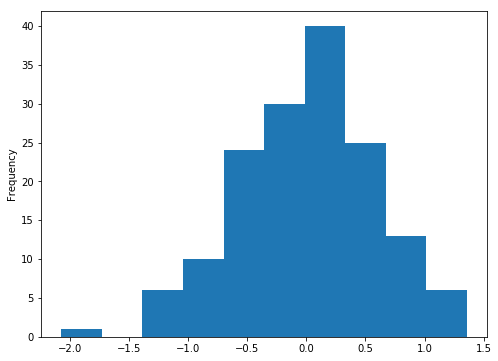

In [17]:
# Above- GDP has a much larger estimated effect than Freedom.
 # (The difference b/w slopes can also be tested for significance, ideally w/ something called bootstrapping, but won't be explored.)
    
# Multiple Regression - can examine relationships b/w any variables,controlling for any number of others.
 # To assess what variables are most important predictors, standardized slopes offer easy solution (they are often comparable to correlations as well, providing a rough mental guide for interpreting them.)
    
## Assumptions of Regression
 # Our assumptions are:
 #   1) Linear model is appropriate
 #   2) Homoskedasticity
 #   3) Observations are independent
 #   4) Our residuals must be normally distributed
 #   5) Our residuals should have a mean of zero
 #   6) The model is correctly specifiied
 #   7) Multicollinearity is not a problem

# Assumption #1 - Is a linear model appropriate?
 # Note that there are a few cases where this IS violated.
  # 1. If y-variable has only two levels (e.g., "purchased product", "did not purchase product"), then a linear model is not appropriate (use logisitic regression)
  # 2. If y-variable is a "count" of something (e.g., how many pairs of shoes owned), negative numbers are impossible & slopes will need to 'bend' as they approach x-axis so they don't cross it.
   # There are 'count' model for that.
  # 3. Math allows for any shape of regression line. Usually simpler models are more correct unless you have good reason to make it non-linear.
   # The more complex a model, the more likely it is to be a "false positive" finding.

# Assumption #2 - Homoskedasicity
 # Residuals are the same all the way up & down the line. Near line at one end & fans out at other end.
  # p-values for slopes use residuals in equations, so if they cary systematically throughout graph, that is a problem.

# Assumption #3 - Observations are independent
 # Data points don't influence each other, which influences residuals, which influences p-values in a problematic way.
 # Violating this assumption tends to make the findings MORE significant so it's good to account for any kind of 'nesting' substructure.
 # Having multiple data points on same observation is one common way to violate this assumption, but other kinds of nesting might as well.
  # Example- data may be nested w/in stores in a way we might want to account for. Linear mixed model is often better & simply extends regression somewhat to account for nesting.

# Assumption #4 & #5 - Residuals must be Normally distributed & w/ mean of 0.
 # Can check w/ histogram
    
# Create a new data frame w/ predictor values & constant
new_predict = data[['GDP','Freedom']]
new_predict = sm.add_constant(new_predict, prepend = False)

# Make prediction w/ new values & 2 predictor model
new_predict['Score'] = res_2.predict(new_predict)

# Compute residuals 
new_predict['Residuals'] = data.Happiness - new_predict.Score

# Plot histogram of residuals
ax = plt.figure(figsize=(8, 6)).gca()    # define axis
new_predict.Residuals.plot.hist(ax = ax)

In [19]:
# Above - Histogram is roughly normal.
 
# Check mean

new_predict['Residuals'].mean()

-1.9110161481934955e-15

In [ ]:
# Above- It has some skew, but it's not terrible.

# Normality of residuals tends to be violated if outcome (y-variable) is skewed.
 # Transformation can be done to outcome variable to make it more normal, but such a transformation is not needed here.
    

# Assumption #6 - Include all causes of outcome in model.
 # Although impossible in practice, can reasonably think through what varaibles are needed to control for when running the regression.
  # You need to know what to control for before the data are collected.

# Assumption #7- Multicollinearity is not a problem.
 # When you control for a variable (e.g., looking at GDP & Happiness, controlling for Freedom), you can cause a problem called multicollinearity.
 # When predictors overlap (correlate) too much among each other, they become useless.
  # In general it's good to avoid having high correlations among predictors, (r= 0.80, r= 0.90, etc.).
   # Slopes can act oddly in such cases, even when reversing directions.